In [1]:
#ライブラリの読み込み
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#グラフの設定
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,10)

In [0]:
#ファイルの読み込み
train_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/test.csv'
train_csv = pd.read_csv(train_url, low_memory=False)
test_csv = pd.read_csv(test_url, low_memory=False)

In [0]:
#説明変数の読み込み
X_trainvalid = train_csv.drop(["price", "id"], axis=1)
X_test = test_csv.drop(["id"], axis=1)

#train dataとtest dataの結合（データの取り扱いを簡単にしています）
X_traintest_temp = pd.concat([X_trainvalid, X_test], axis=0)

In [0]:
#説明変数の選択
#デフォルトではsqft_basementとconditionを用いて予測を行なっている
#X_traintest = X_traintest_temp[['sqft_basement','condition']] 


#ここに価格に影響を与えると分析した要素を入力してください
X_traintest = X_traintest_temp[['sqft_living', 'grade']]


#train dataとtest dataの分割
X_train = X_traintest.iloc[:train_csv.shape[0], :]
X_test = X_traintest.iloc[train_csv.shape[0]:, :]

#目的変数の読み込み（log変換を行なっています）
y_train = np.log(train_csv["price"].values)

#線形回帰モデルの構築とモデルによる予測
model = LinearRegression().fit(X_train, y_train)
test_pred = np.exp(model.predict(X_test))

In [0]:
#提出ファイルの出力
sub_df = pd.DataFrame({"id":test_csv["id"].values,"price":test_pred})
sub_df.to_csv("submission.csv", index=False)

RMSLE: 0.349092


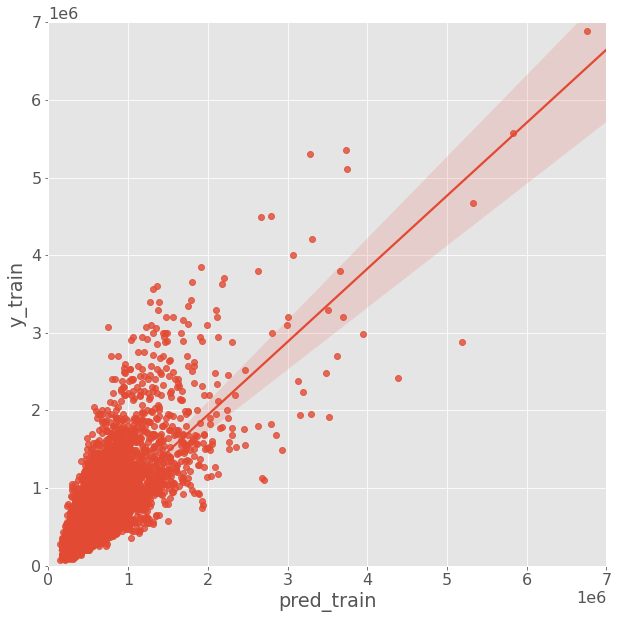

In [12]:
#物件価格の予測と正解データの散布図
#Training dataの物件価格と、Training dataの予測価格を表示しています
train_pred = np.exp(model.predict(X_train))
data = pd.DataFrame({"pred_train": train_pred,"y_train": np.exp(y_train)})
sns.regplot(x="pred_train", y="y_train", data=data)
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)

#RMSLEを表示します
print("RMSLE: %f" % np.sqrt(mean_squared_error(np.log(train_pred), (y_train))))

説明変数を変えるとグラフと誤差RMSLEがどうなるか確認してみましょう。  

In [13]:
#線形回帰モデルの切片の表示
model.intercept_

11.188310365389178

In [14]:
#線形回帰モデルの各説明変数にかかる係数の表示
coef_df = pd.DataFrame(X_train.columns, columns=['Feature'])
coef_df['coefficient'] = pd.Series(model.coef_)
coef_df

,Feature,coefficient
0,sqft_living,0.000216
1,grade,0.184876
